In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import pandas as pd
pd.options.mode.chained_assignment = None

# Data preprocessing

Read ANES dataset from 'anes_timeseries_2016.sav'.

In [2]:
df = pd.read_spss('anes_timeseries_2016.sav')

# (respondents, topics)
df.shape

(4270, 1842)

Selection of topics used in the paper (see Supplemental Material).

In [3]:
my_df = df[['V161242', 'V161227x', 'V161114x', 'V161228x', 'V161194x', 'V161213x', 'V161196x', 
           'V161224a', 'V162263', 'V162271', 'V161346', 'V161508']]
my_df.columns = ['religion', 'same sex', 'obamacare', 'transgender', 'birthright', 'fight ISIS', 'Mexican wall', 
                 'climate change', 'leader', 'born in U.S.', 'feminism', 'women & men']

# To numeric
my_df_num = my_df.applymap(lambda x: x[0:2])
my_df_num = my_df_num.apply(pd.to_numeric, errors='coerce')

# Corrections
my_df_num['religion'] = my_df_num['religion'].apply(lambda x : 0.0 if (x == -1.0) else x)
my_df_num['climate change'] = my_df_num['climate change'].apply(lambda x : 4.0 if (x == -1.0) else x)
my_df_num = my_df_num[my_df_num >= 0]

# Center in 0 and normalization
for c in my_df_num.columns:
    my_df_num[c] = my_df_num[c] - (max(my_df_num[c]) + min(my_df_num[c]))/2
    my_df_num[c] = my_df_num[c]/max(my_df_num[c])

# Polar projection

Useful functions to project data in the polar plane.

In [4]:
# Conviction (radius)
def cart2rho(x, y):
    return np.sqrt(x*x + y*y)

# Orientation (angle)
def cart2phi(x, y):
    return np.arctan2(y, x)

# Modulus of order parameter
def RRR(x):
    return np.sqrt(np.power(np.mean(np.sin(x)), 2) + np.power(np.mean(np.cos(x)), 2))

## Supplementary Figure 1: orientation distributions.

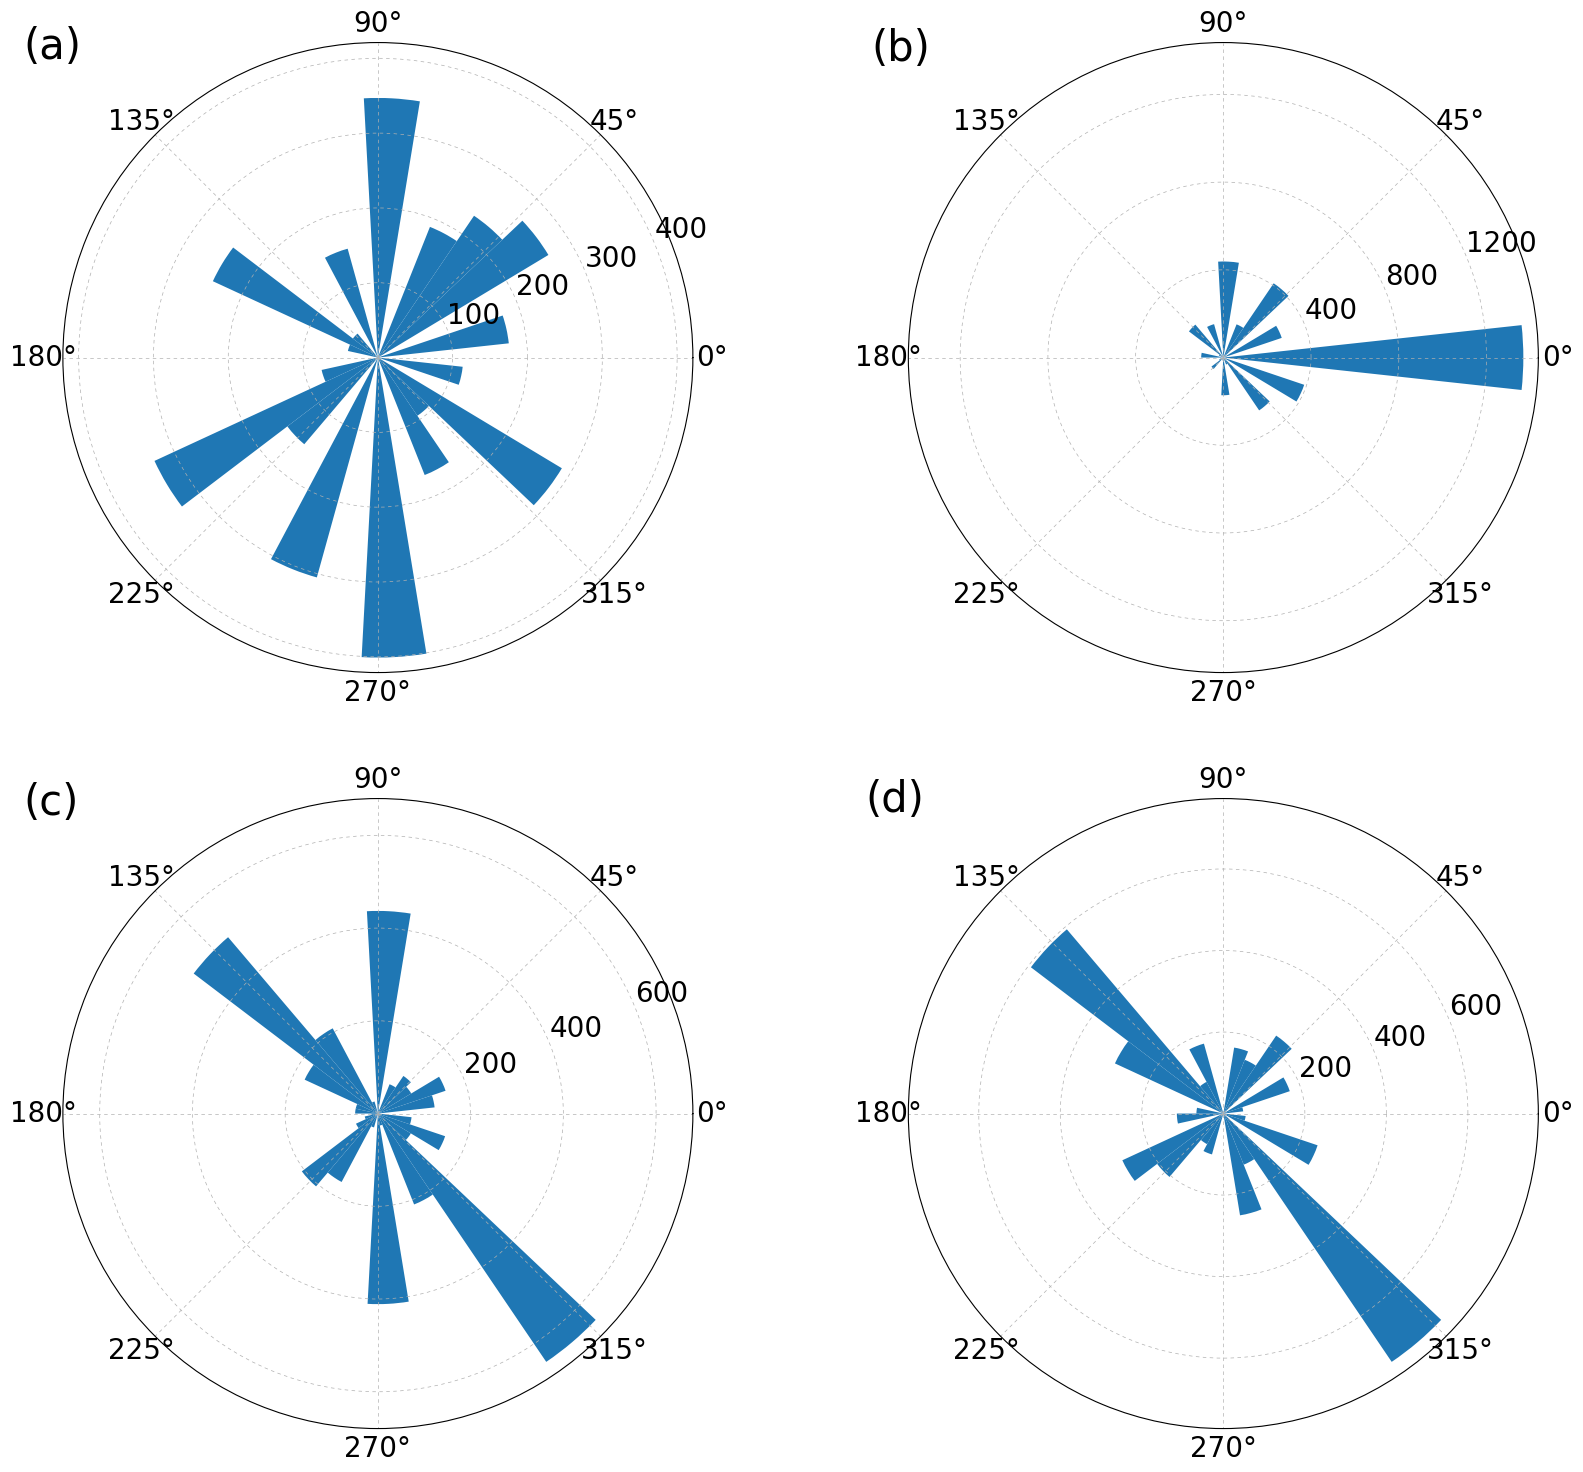

In [5]:
fig, ax = plt.subplots(2, 2, subplot_kw=dict(projection="polar"))
x = [8, 10, 2, 0]
y = [9, 11, 3, 1]
interval = [[100, 200, 300, 400], [400, 800, 1200], [200, 400, 600], [200, 400, 600]]
r_pos = [620, 2100, 1000, 1150]
label = ['(a)', '(b)', '(c)', '(d)']

m = 0
for i in range(2):
    for j in range(2):
        t1 = my_df.columns[x[m]]
        t2 = my_df.columns[y[m]]
        
        dd = my_df_num[[t1,t2]]
        dd.dropna(inplace=True)
        dd['phi'] = dd.apply(lambda x: cart2phi(x[t1], x[t2]), axis=1)
        
        dd.phi.hist(bins=np.linspace(-np.pi, np.pi, 30), ax=ax[i,j], figsize=(20,18))
        ax[i,j].tick_params(labelsize=20)
        ax[i,j].set_rticks(interval[m])
        ax[i,j].grid(linestyle=(0, (5,5)), linewidth=0.5)
        ax[i,j].text(2.44, r_pos[m], label[m], fontsize=30)
        m += 1

## Supplementary Figure 2: conviction distributions.

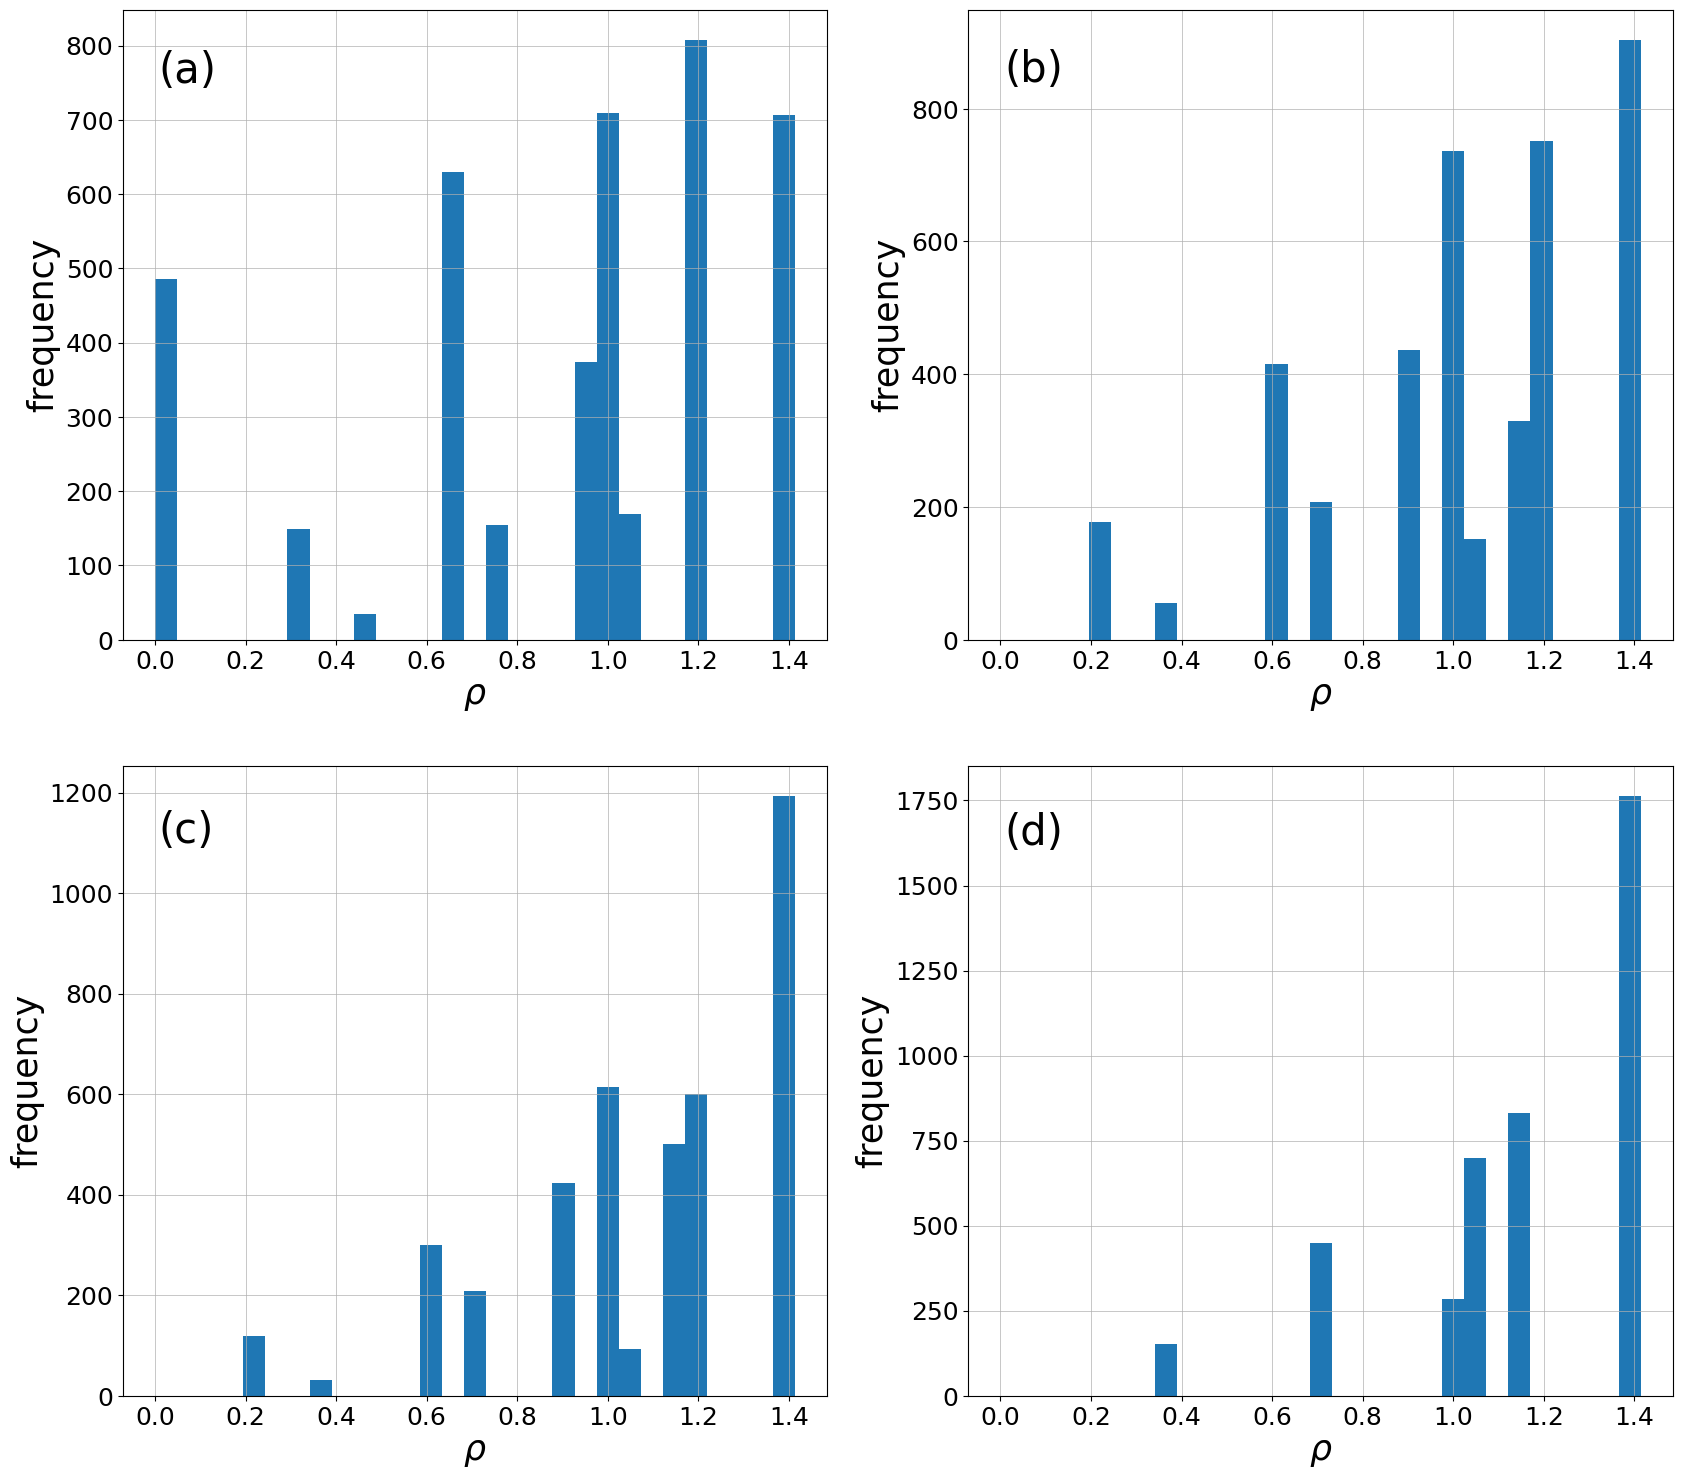

In [6]:
fig, ax = plt.subplots(2, 2)
x = [4, 5, 2, 0]
y = [5, 1, 3, 1]
y_pos = [750, 840, 1100, 1620]
label = ['(a)', '(b)', '(c)', '(d)']

m = 0
for i in range(2):
    for j in range(2):
        t1 = my_df.columns[x[m]]
        t2 = my_df.columns[y[m]]
        
        dd = my_df_num[[t1,t2]]
        dd.dropna(inplace=True)
        dd['rho'] = dd.apply(lambda x: cart2rho(x[t1], x[t2]), axis=1)
        
        dd.rho.hist(bins=np.linspace(0, max(dd['rho']), 30), ax=ax[i,j], figsize=(20,18))
        ax[i,j].tick_params(labelsize=18)
        ax[i,j].grid(linewidth=0.5)
        ax[i,j].text(0.008, y_pos[m], label[m], fontsize=30)
        ax[i,j].set_xlabel(r'$\rho$', fontsize=25)
        ax[i,j].set_ylabel('frequency', fontsize=25)
        m += 1

## Supplementary Figure 3: bimodal distributions.

In [7]:
# Smooth data (jittering)
my_df_jit = my_df_num.copy()
my_df_jit = my_df_jit.applymap(lambda x: x + np.random.normal(0., 0.13))

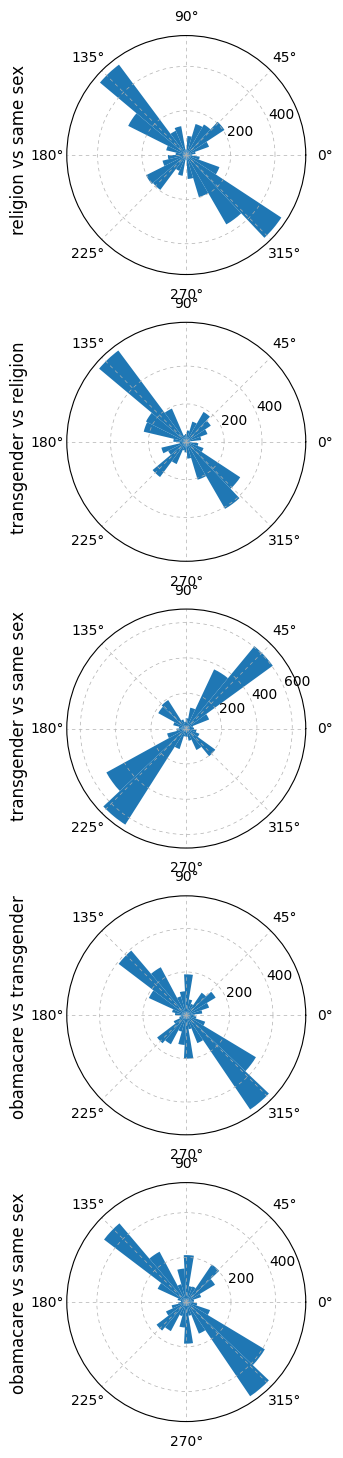

In [8]:
fig, ax = plt.subplots(5, subplot_kw=dict(projection="polar"))
x = [0, 3, 3, 2, 2]
y = [1, 0, 1, 3, 1]
label_x = ['religion', 'transgender', 'transgender', 'obamacare', 'obamacare']
label_y = ['same sex', 'religion', 'same sex', 'transgender', 'same sex']
bins = [28, 28, 26, 30, 30]
interval = [[200, 400], [200, 400], [200, 400, 600], [200, 400], [200, 400]]
ypos = [0.15, 0.1, 0.1, 0.05, 0.1]

for i in range(5):
    t1 = my_df.columns[x[i]]
    t2 = my_df.columns[y[i]]

    dd = my_df_jit[[t1,t2]]
    dd.dropna(inplace=True)
    dd['phi'] = dd.apply(lambda x: cart2phi(x[t1], x[t2]), axis=1)

    dd.phi.hist(bins=np.linspace(-np.pi, np.pi, bins[i]), ax=ax[i], figsize=(20,18))
    ax[i].set_title(label_x[i] + ' vs ' + label_y[i], x=-0.2, y=ypos[i], rotation=90, fontsize=12)
    ax[i].tick_params(labelsize=10)
    ax[i].set_rticks(interval[i])
    ax[i].grid(linestyle=(0, (5,5)), linewidth=0.5)

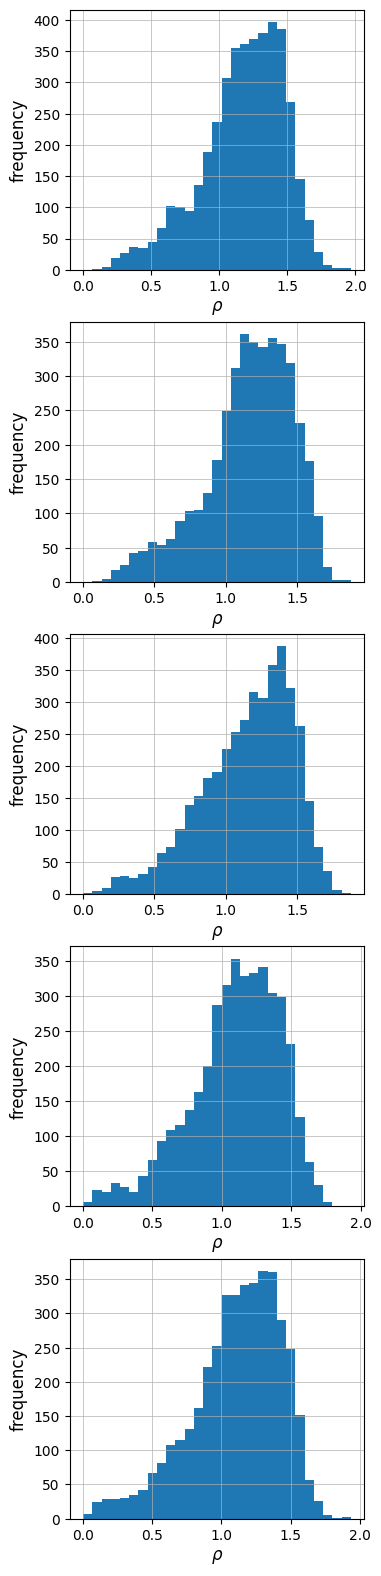

In [9]:
fig, ax = plt.subplots(5)
x = [0, 3, 3, 2, 2]
y = [1, 0, 1, 3, 1]

for i in range(5):
    t1 = my_df.columns[x[i]]
    t2 = my_df.columns[y[i]]

    dd = my_df_jit[[t1,t2]]
    dd.dropna(inplace=True)
    dd['rho'] = dd.apply(lambda x: cart2rho(x[t1], x[t2]), axis=1)

    dd.rho.hist(bins=np.linspace(0, max(dd['rho']), 30), ax=ax[i], figsize=(3.8, 19.6))
    ax[i].tick_params(labelsize=10)
    ax[i].grid(linewidth=0.5)
    ax[i].set_xlabel(r'$\rho$', fontsize=12)
    ax[i].set_ylabel('frequency', fontsize=12)

Other distributions approaching $\alpha \to \infty$.

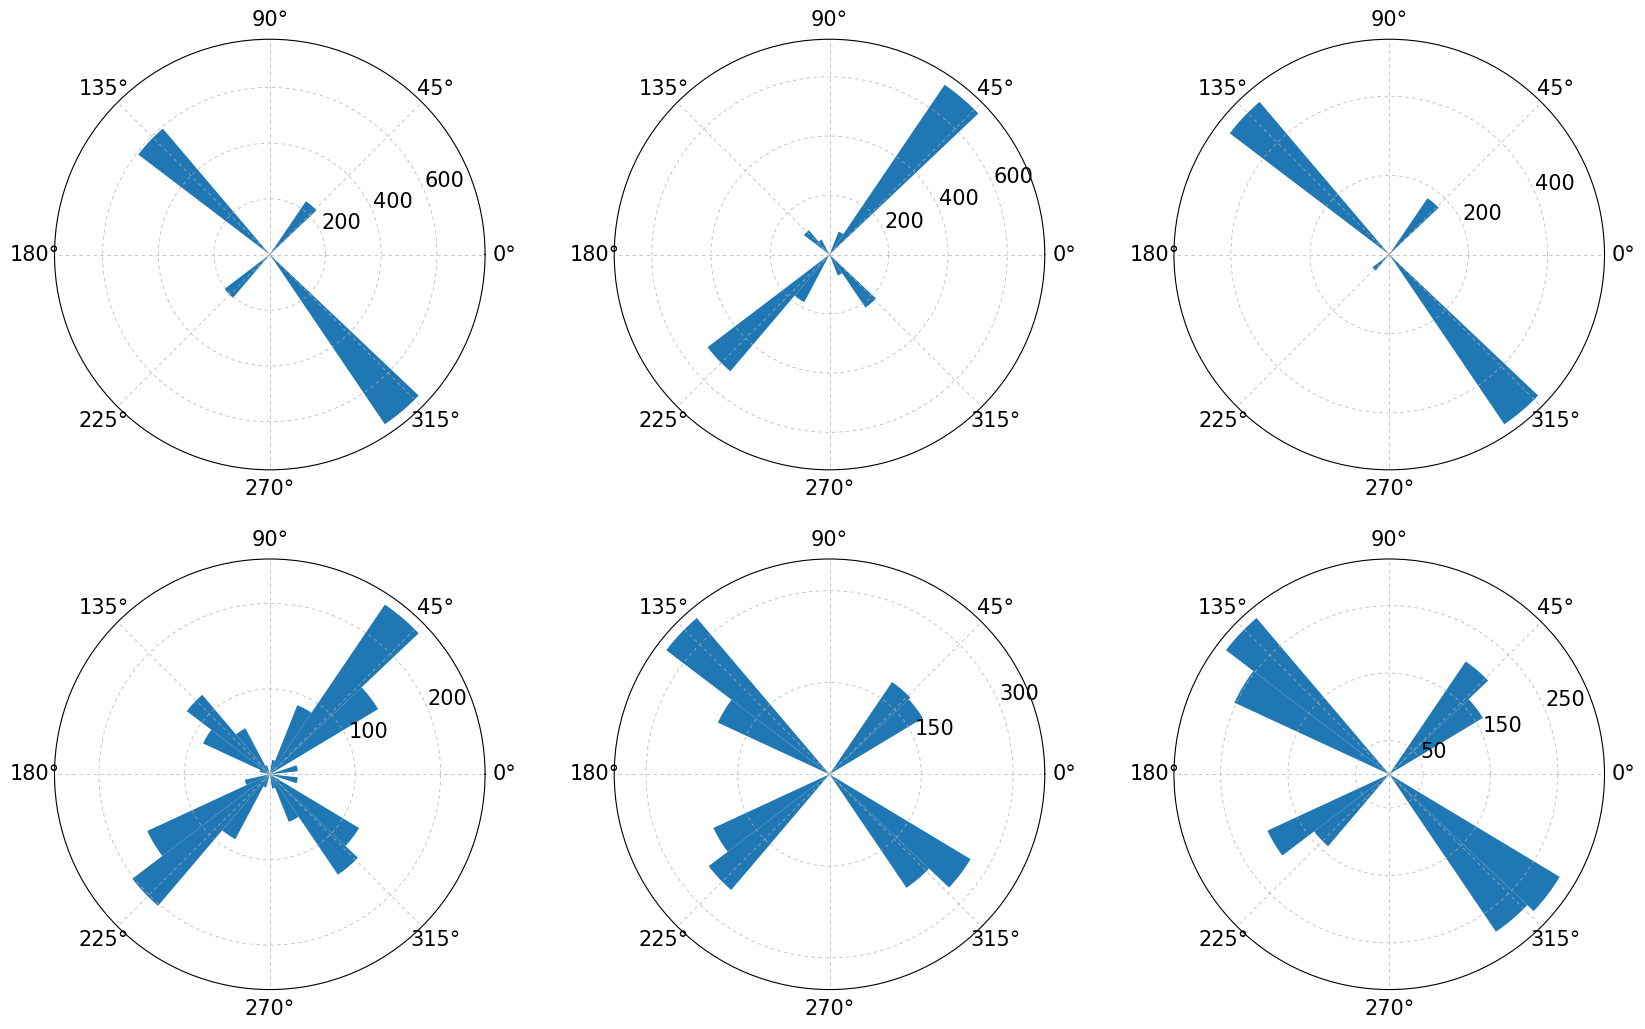

In [17]:
fig, ax = plt.subplots(2, 3, subplot_kw=dict(projection="polar"))
fig.subplots_adjust(hspace=-0.4)
fig.subplots_adjust(wspace=0.3)
x = [0, 6, 2, 4, 7, 0]
y = [1, 1, 6, 5, 5, 5]
interval = [[200, 400, 600], [200, 400, 600], [200, 400], [100, 200], [150, 300], [50, 150, 250]]

m = 0
for i in range(2):
    for j in range(3):
        t1 = my_df.columns[x[m]]
        t2 = my_df.columns[y[m]]
        
        dd = my_df_num[[t1,t2]]
        dd.dropna(inplace=True)
        dd['rho'] = dd.apply(lambda x: cart2rho(x[t1], x[t2]), axis=1)
        dd['phi'] = dd.apply(lambda x: cart2phi(x[t1], x[t2]), axis=1)
        dd = dd[dd['rho'] > dd['rho'].median()]
        
        dd.phi.hist(bins=np.linspace(-np.pi, np.pi,  30), ax = ax[i,j], figsize=(20,18))
        ax[i,j].tick_params(labelsize=15)
        ax[i,j].set_rticks(interval[m])
        ax[i,j].grid(linestyle=(0, (5,5)), linewidth=0.5)
        m += 1